In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape[0]

200

In [ ]:
df.shape[1]

5

In [ ]:
df.tail(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
199,200,Male,30,137,83


In [ ]:
df.describe(include = 'all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [ ]:
df.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [ ]:
df.describe(include = )

SyntaxError: invalid syntax (<ipython-input-16-3c4f86b47edd>, line 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
LE = LabelEncoder()

In [ ]:
df['Gender'] = LE.fit_transform(df['Gender'])
df['Gender'].unique()

array([1, 0])

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
r_data = pca.fit_transform(df)
r_data

array([[-1.09383941e+02, -5.47845404e+00],
       [-1.08202857e+02,  3.49317649e+01],
       [-1.07376292e+02, -3.78408717e+01],
       [-1.06007807e+02,  3.05626965e+01],
       [-1.04980323e+02, -7.29674715e+00],
       [-1.03774723e+02,  2.98012381e+01],
       [-1.02996481e+02, -4.13227699e+01],
       [-1.01426745e+02,  4.70713035e+01],
       [-1.00952191e+02, -5.09237382e+01],
       [-9.93805223e+01,  2.40346077e+01],
       [-9.90706564e+01, -4.09178725e+01],
       [-9.74040858e+01,  4.91523683e+01],
       [-9.67777825e+01, -3.78938689e+01],
       [-9.52523148e+01,  3.02508027e+01],
       [-9.48417033e+01, -3.50274282e+01],
       [-9.34009908e+01,  3.26452221e+01],
       [-9.24499251e+01, -1.31741290e+01],
       [-9.12420152e+01,  2.04349779e+01],
       [-8.99471970e+01, -2.29456992e+01],
       [-8.84752130e+01,  4.81072460e+01],
       [-8.75736418e+01, -1.32190190e+01],
       [-8.63488497e+01,  2.60551150e+01],
       [-8.56046385e+01, -4.49591024e+01],
       [-8.

In [ ]:
data = preprocessing.scale(r_data)
data

array([[-1.73070770e+00, -2.08397552e-01],
       [-1.71202022e+00,  1.32878623e+00],
       [-1.69894204e+00, -1.43944714e+00],
       [-1.67728943e+00,  1.16258913e+00],
       [-1.66103225e+00, -2.77564479e-01],
       [-1.64195687e+00,  1.13362365e+00],
       [-1.62964327e+00, -1.57189675e+00],
       [-1.60480640e+00,  1.79056798e+00],
       [-1.59729787e+00, -1.93711261e+00],
       [-1.57243042e+00,  9.14264018e-01],
       [-1.56752762e+00, -1.55649466e+00],
       [-1.54115861e+00,  1.86973061e+00],
       [-1.53124903e+00, -1.44146313e+00],
       [-1.50711260e+00,  1.15072485e+00],
       [-1.50061577e+00, -1.33242521e+00],
       [-1.47782036e+00,  1.24180733e+00],
       [-1.46277229e+00, -5.01137037e-01],
       [-1.44366035e+00,  7.77335966e-01],
       [-1.42317333e+00, -8.72842503e-01],
       [-1.39988312e+00,  1.82997470e+00],
       [-1.38561818e+00, -5.02844629e-01],
       [-1.36623912e+00,  9.91123068e-01],
       [-1.35446398e+00, -1.71022095e+00],
       [-1.

In [ ]:
data = pd.DataFrame(data, columns=['X', 'Y'])
data

,X,Y
0,-1.730708,-0.208398
1,-1.712020,1.328786
2,-1.698942,-1.439447
3,-1.677289,1.162589
4,-1.661032,-0.277564
...,...,...
195,1.766603,1.063761
196,1.813481,-0.913626
197,1.833989,0.902676
198,1.913550,-1.173894


In [ ]:
sse = []
for k in range(1,10):
  km = KMeans(n_clusters = k)
  km.fit(data)
  sse.append(km.inertia_)

Text(0, 0.5, 'SSE')

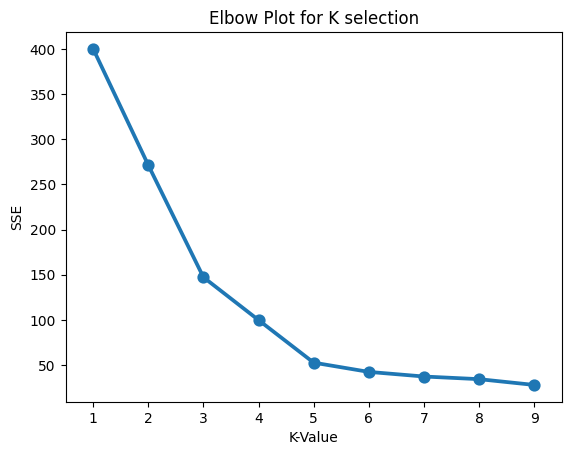

In [ ]:
sns.pointplot(x = list(range(1,10)), y = sse)
plt.title('Elbow Plot for K selection')
plt.xlabel('K-Value')
plt.ylabel('SSE')

In [ ]:
!pip install kneed==0.8.3

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(np.arange(1,10), sse, S = 1.0, curve = 'convex', direction = 'decreasing')

In [ ]:
print(kl.elbow)

5


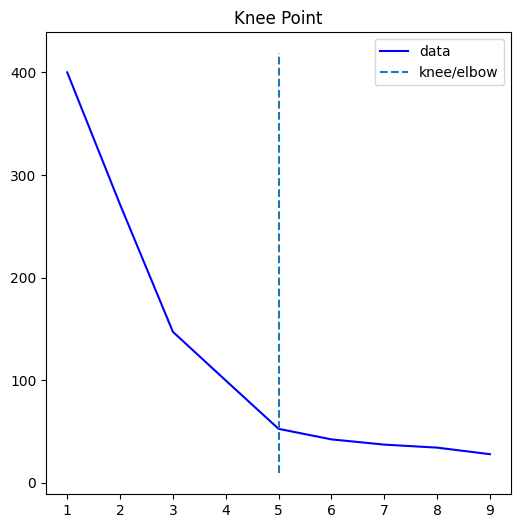

In [ ]:
kl.plot_knee()

In [ ]:
kmeans = KMeans(n_clusters = 4)

In [ ]:




cluster = kmeans.fit_predict(data[['X', 'Y']])

In [ ]:
data['cluster'] = cluster

In [ ]:
data.head()

,X,Y,cluster
0,-1.730708,-0.208398,3
1,-1.712020,1.328786,0
2,-1.698942,-1.439447,3
3,-1.677289,1.162589,0
4,-1.661032,-0.277564,3


In [ ]:
data['cluster'].value_counts()

,count
cluster,
3,100
2,39
1,38
0,23


In [ ]:
df1 = data[data['cluster'] ==0]
df2 = data[data['cluster'] ==1]
df3 = data[data['cluster'] ==2]
df4 = data[data['cluster'] ==3]

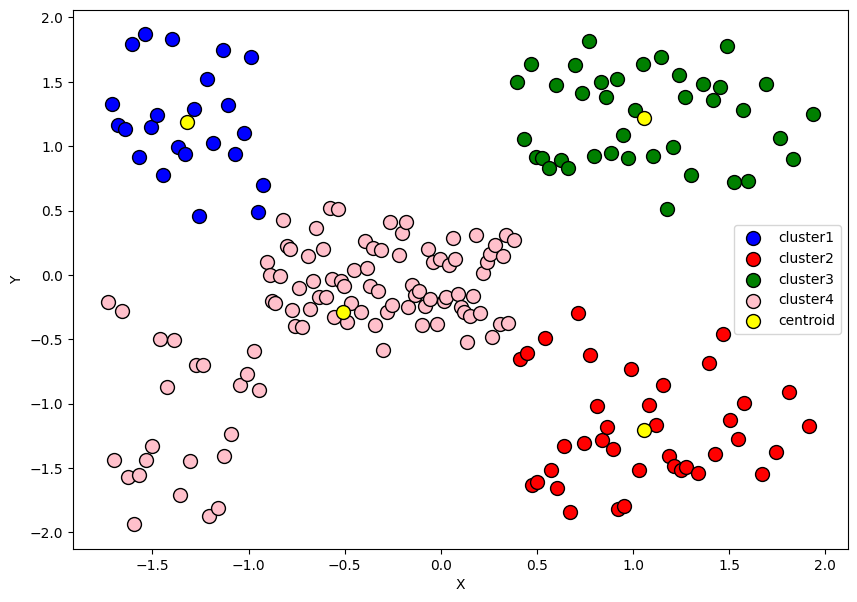

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(df1.values[:,0], df1.values[:,1], color = 'blue', label = 'cluster1', edgecolor = 'black', s = 100)
plt.scatter(df2.values[:,0], df2.values[:,1], color = 'red', label = 'cluster2', edgecolor = 'black', s = 100)
plt.scatter(df3.values[:,0], df3.values[:,1], color = 'green', label = 'cluster3', edgecolor = 'black', s = 100)
plt.scatter(df4.values[:,0], df4.values[:,1], color = 'pink', label = 'cluster4', edgecolor = 'black', s = 100)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'yellow', label = 'centroid', edgecolor = 'black', s = 100)
plt.legend()
plt.show()

In [ ]:
import scipy.cluster.hierarchy as sch


In [ ]:
data1 = data.sample(100)


In [ ]:
H = AgglomerativeClustering(n_clusters = 2, linkage = 'single') #, affinity = 'euclidean'

In [ ]:
pred = H.fit_predict(data)

In [ ]:
temp = data

In [ ]:
temp['cluster'] = pred


In [ ]:
temp['cluster'].value_counts()

,count
cluster,
0,177
1,23


In [ ]:
temp1 = temp[temp['cluster'] == 0]
temp2 = temp[temp['cluster'] == 1]

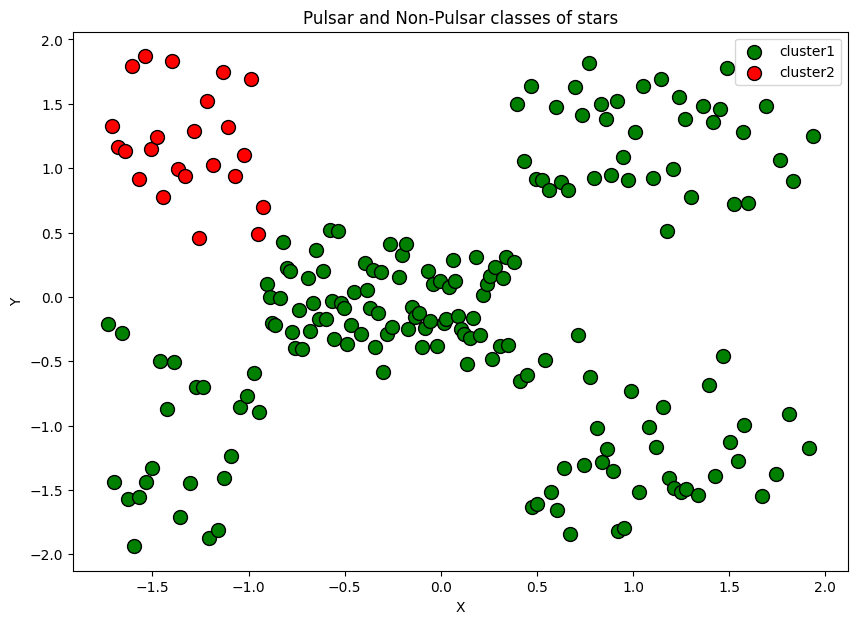

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(temp1.values[:,0], temp1.values[:,1], color = 'green', label = 'cluster1', edgecolor = 'black', s = 100)
plt.scatter(temp2.values[:,0], temp2.values[:,1], color = 'red', label = 'cluster2', edgecolor = 'black', s = 100)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pulsar and Non-Pulsar classes of stars')
plt.legend()
plt.show()

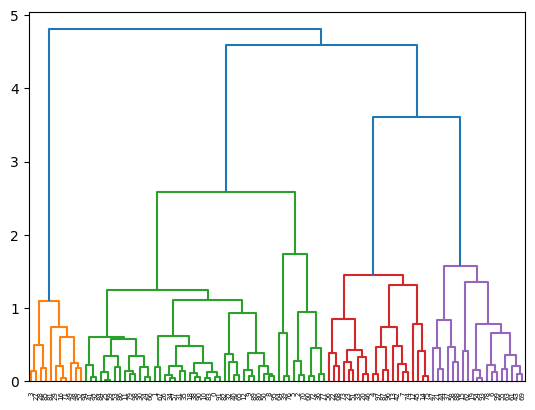

In [ ]:
dend = sch.dendrogram(sch.linkage(data1.values, method = 'complete'))

In [ ]:
H = AgglomerativeClustering(n_clusters = 2, linkage = 'complete')

In [ ]:
H

AgglomerativeClustering(linkage='complete')

In [ ]:
pred = H.fit_predict(data)

In [ ]:
temp = data

In [ ]:
temp['cluster'] = pred

In [ ]:
temp['cluster'].value_counts()

,count
cluster,
0,128
1,72


In [ ]:
temp1 = temp[temp['cluster'] == 0]
temp2 = temp[temp['cluster'] == 1]

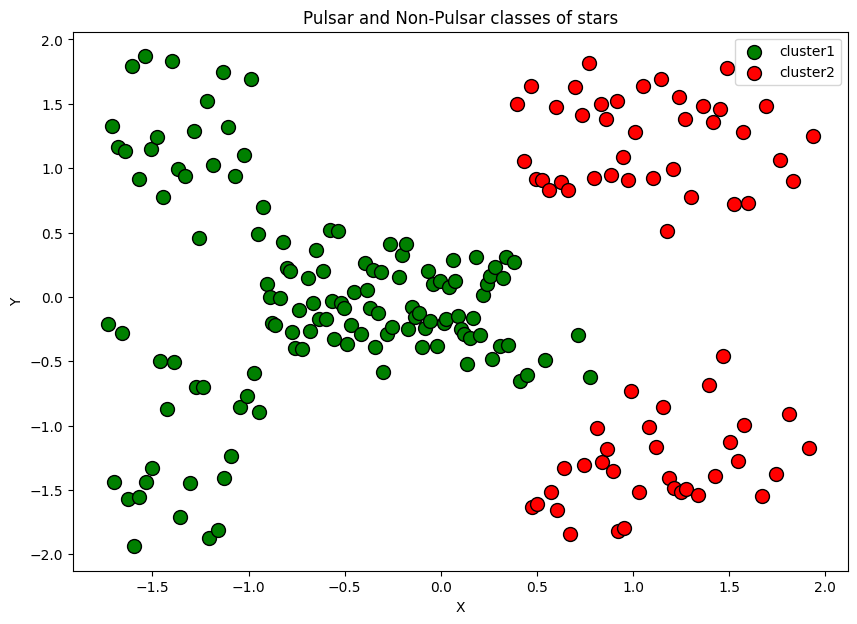

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(temp1.values[:,0], temp1.values[:,1], color = 'green', label = 'cluster1', edgecolor = 'black', s = 100)
plt.scatter(temp2.values[:,0], temp2.values[:,1], color = 'red', label = 'cluster2', edgecolor = 'black', s = 100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pulsar and Non-Pulsar classes of stars')
plt.legend()
plt.show()
plt